<div class="alert alert-info">
    <font color = black>
    <h1> Lab | Inferential statistics - ANOVA</h1>
    </font>

</div>

Note: The following lab is divided in 2 sections which represent activities 3 and 4.


### Context
Suppose you are working as an analyst in a microprocessor chip manufacturing plant. You have been given the task of analyzing a plasma etching process with respect to changing Power (in Watts) of the plasma beam. Data was collected and provided to you to conduct statistical analysis and **check if changing the power of the plasma beam has any effect on the etching rate** by the machine. **You will conduct ANOVA and check if there is any difference in the mean etching rate for different levels of power.** You can find the data anova_lab_data.xlsx file in the files_for_lab folder




## Part 1


In this activity, we will look at another example. 

Your task is to understand the problem and write down all the steps to set up ANOVA. After the next lesson, we will ask you to solve this problem using Python. Here are the steps that you would need to work on: 


- State the null hypothesis

- State the alternate hypothesis

- What is the significance level

- What are the degrees of freedom of model, error terms, and total DoF


---


<div class="alert alert-success">
    <font color = black>

#### Null Hypothesis 
   H<sub>0</sub>: There is no difference in the mean etching rate for different levels of power (μ1 = μ2 = μ3).

#### Alternative Hypothesis

   H<sub>a</sub>: The mean of at least one etching rate is different among the "power" groups.

#### Level of significance 

   Alpha (α) = 0.05

#### Degree of freedom

   - Degree of freedom<sub>1</sub> = 2
   - Degree of freedom<sub>2</sub> (Error terms) = 12
   - Total degree of freedom = 14

</font>
</div>


---

## Part 2
In this section, use Python to conduct ANOVA.
What conclusions can you draw from the experiment and why?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('anova_lab_data.xlsx', sheet_name='data_collected')
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.head()

,power,etching_rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71


In [3]:
# Check mean of of etching_rate for each power groups
mean_std = df.groupby("power").agg(np.mean)
mean_std = mean_std.rename(columns={'etching_rate': 'mean_etching_rate'})
mean_std

,mean_etching_rate
power,
160 W,5.792
180 W,6.238
200 W,8.318


In [4]:
# Check standard deviation of etching_rate for each power groups & add into the same dataframe
mean_std["std_etching_rate"] = df.groupby("power").agg(np.std)
mean_std

,mean_etching_rate,std_etching_rate
power,,
160 W,5.792,0.319875
180 W,6.238,0.434304
200 W,8.318,0.669604


Text(0, 0.5, 'Average Etching Rate')

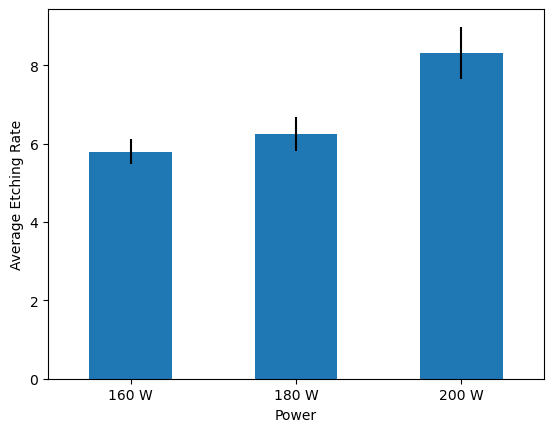

In [5]:
# Visulaize bar plot with error bar for a quick check of differences among 3 groups

mean_std.plot.bar(y = "mean_etching_rate", yerr = "std_etching_rate", legend = False)
plt.xticks(rotation = 0)
plt.xlabel("Power")
plt.ylabel("Average Etching Rate")

### Observation
- From this simple plot, we observe the power of 200 W is significantly higher (denoted by the error bar) in the etching rate compared to both the 160 W and 180 W groups.

- On the other hand, the standard deviation (error) bars between 160 W and 180 W overlapped. Therefore, there's no difference between these two groups. 


### Next step: 
1. Prove this observation using ANOVA (F-test) to find a difference among the three groups.
2. After that we can test each pair from this observation if it's true
    
    2.1 T-test between 200W and 160W
    
    2.2 T-test between 200W and 180W

## 1. ANOVA test

### Determine if any level of power has an effect on the etching rate 

In [6]:
model = ols('etching_rate ~ C(power)', data=df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(power),2.0,18.176653,9.088327,36.878955,0.000008
Residual,12.0,2.957240,0.246437,NaN,NaN


- From the ANOVA test, the **p-value is < 0.05**. Therefore, **the null hypothesis is rejected** indicating a difference among the groups.
- This means **there is at least one group of the power levels that has an effect on the etching rate**.
- Next, we will find out which group of power does that.


# 2. T-test
### Determine which level of power has an effect on the etching rate

From the plot above, we already get an idea on which group has an effect on the etching rate.
Therefore, we will prove that by performing 

    2.1 T-test between 200W and 160W
    2.2 T-test between 200W and 180W



### Pair T-test (ttest_ind)

In [7]:
power_a = df[df["power"] == "200 W"]["etching_rate"]

for power in df["power"].unique():
    power_b = df[df["power"] == power]["etching_rate"]
    print(power, ttest_ind(power_a, power_b))

160 W Ttest_indResult(statistic=7.611403634613074, pvalue=6.237977344615716e-05)
180 W Ttest_indResult(statistic=5.827496614588661, pvalue=0.0003926796476049085)
200 W Ttest_indResult(statistic=0.0, pvalue=1.0)


### Conclusion
- The p-value of:
    - 200 W against 160 W is < 0.05 (6.2379e-05) 
    - 200 W against 180 W is < 0.05 (0.0003)

- Therefore, the null hypothesis is rejected in both cases, indicating that 200 W power has a significantly different effect on the etching rate compared to the 160 W and 180 W.
- The result conformed to the result from the observation we have got from the bar graph above.

### Pair T-test (t_test_pairwise)

In [8]:
# One-way ANOVA 
mod = ols('etching_rate ~ power', data=df).fit()   
print(sm.stats.anova_lm(mod, typ=2))

# pair t-test using t_test_pairwise method
mod.t_test_pairwise('power').result_frame

             sum_sq    df          F    PR(>F)
power     18.176653   2.0  36.878955  0.000008
Residual   2.957240  12.0        NaN       NaN


,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
180 W-160 W,0.446,0.313966,1.420536,0.180910,-0.238073,1.130073,0.180910,False
200 W-160 W,2.526,0.313966,8.045456,0.000004,1.841927,3.210073,0.000011,True
200 W-180 W,2.080,0.313966,6.624921,0.000024,1.395927,2.764073,0.000049,True


### Conclusion 
- Here we use another method (t_test_pairwise) for comparing each pair.
- The p-value of:
    - 180 W against 160 W is > 0.05 (0.180910) not enough evident to reject the null hypothesis 
    - 200 W against 160 W is < 0.05 (0.000011) rejected the null hypothesis
    - 200 W against 180 W is < 0.05 (0.000049) rejected the null hypothesis

- The result is consistent with the outcome from the previous T-test as well as the observation  from the bar graph above.
- Additionally, the result confirmed there is no difference between the group of 180 W and 160 W.

In [9]:
#### END OF THE LAB & THANK YOU !!! 💖 ####